 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://www.nicepng.com/png/full/204-2043038_white-lightbulb-icon-light-bulb-icon-white.png" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left"  /> <span style="position:relative; bottom:75px; left:20px">Signal Classification</span> </div>

# I. Introduction
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


On this notebook we perform the classification of signal modalities using the biosppy library and machine learning tools.

## <div style="color:#00a0e4"> 1. Background </div>


Over the last years, multimodal devices for biomedical research have greatly spread to everyone daily lives. These enable the use of various combinations of physiological sensors, however, little attention has been paid to the problem of automatic identification of each sensor type, the knowledge of which, being of paramount importance to the adequate design of the subsequent processing and data analysis tasks.


In this work we propose a framework for the automatic identification of sensor data types, namely Respiration (RESP), Electrocardiography (ECG), Electrodermal Activity (EDA), Blood Volume Pulse (BVP) data, and Electromyography (EMG) through Supervised Learning Classifiers.

## <div style="color:#00a0e4"> 2. Objectives</div>
* Analyse different physiological sensor signals
* Load txt data from different sensor inputs
* Explore different Supervised Learning classifiers and their hyperparemeters
* Classification of signal modalities

# II. Experimental

<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

This section should guide the students during their experimental procedure, and contain the most relevant content.

### <div style="color:#00a0e4">  1. Requirements </div>

In this section, the libraries required should be installed, using the command:

In [1]:
!pip install [biosppy] >/dev/null 2>&1
#!pip install mpld3 >/dev/null 2>&1

and imported:

In [2]:
import biosppy as bs
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#import mpld3 
#mpld3.enable_notebook()

### <div style="color:#00a0e4">  2. Data Loading </div>

In this example you can choose to use your own files or upload the our example file given [here](https://github.com/PatriciaBota/BioSPPy/tree/master/examples). Right click with your mouse each file and download the data files: 
- ecg.txt - containing ECG sensor data; 
- resp.txt - containing RESP sensor data; 
- emg.txt - containing EMG sensor data; 
- bvp.txt - containing BVP sensor data; 
- eda.txt - containing EDA sensor data; 

Open the .txt file to take a look at the data. As it can be seen, at first glance, without the given labels there is no way to know to which each modality the data belongs to.

In [ ]:
ecgData = np.loadtxt("https://raw.githubusercontent.com/JoanaFigPinto//notebooksIT/master/Example_Files/ecg.txt")
edaData = np.loadtxt("https://raw.githubusercontent.com/JoanaFigPinto//notebooksIT/master/Example_Files/eda.txt")
respData = np.loadtxt("https://raw.githubusercontent.com/JoanaFigPinto//notebooksIT/master/Example_Files/resp.txt")
emgData = np.loadtxt("https://raw.githubusercontent.com/JoanaFigPinto//notebooksIT/master/Example_Files/emg.txt")
bvpData = np.loadtxt("https://raw.githubusercontent.com/JoanaFigPinto//notebooksIT/master/Example_Files/bvp.txt")

### <div style="color:#00a0e4">   3. Data Visualization </div>

Visualize the different signal modalities to observe their similarities and discrepancies.

#### <div style="color:#00a0e4">   3.1. Plot Example  </div>

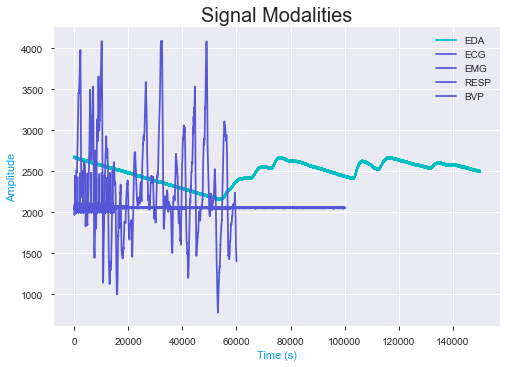

In [4]:
# plot
plt.title('Signal Modalities', {'size':20})
plt.xlabel('Time (s)', color="#00a0e4")
plt.ylabel('Amplitude', color="#00a0e4")
plt.plot(edaData, label='EDA', color="#00bfc2")
plt.plot(ecgData, label='ECG', color="#5756d6")
plt.plot(emgData, label='EMG', color="#5756d6")
plt.plot(respData, label='RESP', color="#5756d6")
plt.plot(bvpData, label='BVP', color="#5756d6")
plt.legend()
plt.show()


### <div style="color:#00a0e4">   4. Machine Learning </div>
#### <div style="color:#00a0e4">   4.1. Key ML Terminology  </div>

<img src="https://i.ibb.co/mSSQrFF/SL.jpg" alt="SL" style="width: 300px;"/>

Given a training set, to learn a function h : X → Y so that h(x) is a “good” predictor for the corresponding value of y. For historical reasons, this function h is called a hypothesis [1](http://cs229.stanford.edu/notes2019fall/cs229-notes1.pdf).


A **feature** is an input variable [2](https://developers.google.com/machine-learning/crash-course/framing/ml-terminology).

A **label** is the thing we're predicting—the signal modality [2](https://developers.google.com/machine-learning/crash-course/framing/ml-terminology).

#### <div style="color:#00a0e4">   4.2. Feature Extraction  </div>

<img src="https://i.ibb.co/SKV3PMW/FE.jpg" alt="FE" style="width: 800px;"/>


In [5]:
from sklearn.preprocessing import minmax_scale  # import normalized scale

data = [edaData, ecgData, emgData, respData, bvpData]
SR = 1000  # sampling rate
wind_size = 5*SR  # define windows size
X = []
y = []

for i, d in enumerate(data):  # iterate over the data
    segData = [d[wind_idx:wind_idx + wind_size] for wind_idx in range(0, len(d) - wind_size, wind_size)]  # segment the data
    for windows in segData: # iterate over segmented windows
        wind_features = bs.signals.tools.signal_stats(windows) # extract features using the biosppy library
        X += [wind_features[:]]  # add extracted features to the feature vector
        y += [i] # add groud-truth labels
        
featuresLabels = wind_features.keys() # get name of the features extracted
X = np.array(minmax_scale(X)) # scale features between 0-1 and corver to numpy array
y = np.array(y) # convert groud-truth labels to numpy array

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:white;"> 
    Explore not normalizing the data and how different normalization options (https://scikit-learn.org/stable/modules/preprocessing.html) impact the different classifiers.  
</div>

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:white;"> 
    Explore how different windows sizes impact the classifion results. 
</div>

In [6]:
X.shape, y.shape  # 61 samples with 10 features

((64, 10), (64,))

In [7]:
np.unique(y) # ground-truth labels (0 - EDA; 1 - ECG; 2 - EMG; 3 - RESP, 4 - BVP)

array([0, 1, 2, 3, 4])

In [8]:
# Observe the data
df = pd.DataFrame(data=X, columns=featuresLabels) # covert to pandas dataframe

df.style.set_table_styles([dict(selector="th", props=[("font-size", "125%"),("color", "black"),
                               ("text-align", "center")]), 
                             dict(selector="tr", props=[("color", "#00a0e4"),
                               ("text-align", "center")])])

,mean,median,min,max,max_amp,var,std_dev,abs_dev,kurtosis,skewness
0,0.816008,0.679929,0.990826,0.306253,0.015709,0.000453,0.019280,0.020366,0.021110,0.126528
1,0.766590,0.635721,0.966541,0.280650,0.014179,0.000410,0.018240,0.019595,0.016916,0.147171
2,0.720173,0.593280,0.941716,0.258493,0.014962,0.000383,0.017569,0.018457,0.022418,0.174555
3,0.674871,0.555261,0.915812,0.235352,0.014485,0.000400,0.017997,0.018925,0.022406,0.122019
4,0.626604,0.511936,0.889908,0.211718,0.014314,0.000459,0.019413,0.021067,0.014105,0.144202
5,0.577664,0.467728,0.862925,0.188577,0.015319,0.000420,0.018498,0.019500,0.022328,0.153798
6,0.530647,0.427056,0.837561,0.163959,0.014812,0.000418,0.018436,0.019655,0.018857,0.128805
7,0.483632,0.384615,0.812736,0.140817,0.014243,0.000432,0.018770,0.020178,0.016829,0.146430
8,0.435501,0.342175,0.785753,0.118168,0.015210,0.000435,0.018840,0.019903,0.021297,0.150672
9,0.386367,0.298851,0.759309,0.093550,0.015108,0.000413,0.018311,0.019399,0.020736,0.135946


#### <div style="color:#00a0e4">   4.4. Learn Model  </div>

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score

classifiers = [
        KNeighborsClassifier(),  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
        DecisionTreeClassifier(), # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
        RandomForestClassifier(), # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
        GaussianNB(), # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
        LogisticRegression(), # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
        svm.SVC(), # https://scikit-learn.org/stable/modules/svm.html
        AdaBoostClassifier() # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
]

#choose classifier
classifier = KNeighborsClassifier(n_neighbors = 3)  # call the classifier

<div style="background:#62d321;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:white;"> 
    Explore the different classifiers and their hyperparemeters. For more information on the latter got to sklearn documentation in https://scikit-learn.org/stable/supervised_learning.html
      
      (e.g. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)     
</div>

In [10]:
from sklearn.model_selection import cross_val_score

# k-fold cross-validation
NUMBER_FOLDS = 3  # define number of folds for cross-valiation
print('Accuracy (%): ', np.mean(cross_val_score(classifier, X, y, cv=NUMBER_FOLDS))*100, " +- ", np.std(cross_val_score(classifier, X, y, cv=3))*100)

Accuracy (%):  96.89754689754689  +-  2.195544596638231


#### <div style="color:#00a0e4">   4.3. Splitting Data  </div>

![alt text](https://i.ibb.co/vY7zFjM/swim-Split-Data.png)

*   training set—a subset to train a model.

*   test set—an independent subset to test the trained model.

In [11]:
from sklearn.model_selection import train_test_split

# Separate in train and set set
X_train, X_test, y_train, y_test = train_test_split(X.astype(np.float), y.astype(np.int), test_size=0.3, random_state=42, stratify=y)

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    During the splitting of the data, since the data is highly imbalanced and we use a very small amount of example data, we use the stratify hyperparemeter set to the ground-truth labels so the data is proportionally distributed per class in the training and test sets.
</div>

In [12]:
# Fit supervised Learning Classifiers on the training set data
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### <div style="color:#00a0e4">   4.5. Evaluate Model  </div>

In [13]:
# make the classifier prediction on the test set
y_predicted = classifier.predict(X_test)
y_predicted

array([2, 2, 0, 0, 3, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 4, 0, 0, 3, 3])

In [14]:
from sklearn.metrics import classification_report

## Observe the classification report
target_names = ['EDA', 'ECG', 'EMG', 'RESP', 'BVP']
print(classification_report(y_test, y_predicted, target_names=target_names))
print('\n')

              precision    recall  f1-score   support

         EDA       1.00      1.00      1.00         9
         ECG       0.00      0.00      0.00         1
         EMG       0.86      1.00      0.92         6
        RESP       1.00      1.00      1.00         3
         BVP       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.77      0.80      0.78        20
weighted avg       0.91      0.95      0.93        20





<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    In the case of highly highly imbalanced data, the F1-score, precision and recall per class are more informative than the accuracy score, which does not take into consideration the class imbalance.
</div>

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

def plot_confusion_matrix(y_true, y_pred, true_labels=None, normalize=True, title=''):
    """

    :param y_true: type(array), contains true labels
    :param y_pred: type(array), contains predicted labels
    :param true_labels: list of unique labels
    :param normalize: boolean
    :return:
    """
    if true_labels is None:
        true_labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=true_labels)
    if normalize:
        cm = np.round(cm / np.max(cm), 2)
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    ax.set_title(title)
    sb.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')  # annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticklabels(true_labels, fontsize=10)
    ax.xaxis.tick_top()
    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(true_labels, fontsize=10)

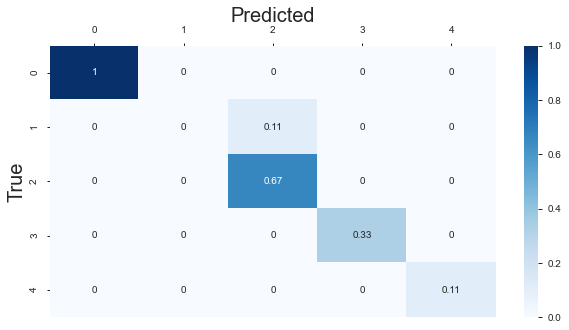

In [16]:
# Confusion Matrix
target_names = np.unique(y_test)
plot_confusion_matrix(y_test, y_predicted, true_labels=target_names)

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    The confusion matrix can be an highly informative visualization tool to observe which classes are getting confused, and which classes show high discrimination.
</div>

# III. Explore
<div class='h1'  style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" > </div>

### <div style="color:#00a0e4">  1. Final Notes </div>

In this notebook we performed a comprehensive study of different supervised learning classifiers for signal classifcation. The experimental results on 5 signal modalities led to high accuracy results, thus paving the way to the development of systems capable of automatically identifying the sensor types solely based on the structure of the data stream itself, and subsequently apply the most appropriate data processing and analysis frameworks.

### <div style="color:#00a0e4">  2. Quiz  </div>

1. Explore different classifiers and their hyperparameters. Which classifier/hyperparemeters combination returns the best performance?
2. The data used in this notebook is highly imbalanced. Explore how to respond to this issue.
3. What other features could be explored to classify the different signal modalities?
4. Apply feature selection techniques to remove redundacies and decrease the feature vector dimensionality.
5. In our case, we dealed with a small sample of data with only 1 record per class label, for larger datasets with several files per user, explore different evaluation techniques and its impact on the classifier results.

### <div style="color:#00a0e4">  3. Further Reading  </div>
1. Explore how to acquire your own physiological data [ScienceJournal](../1.Signal_Acquisition/ScienceJournal.ipynb) [OpenSignals](../1.Signal_Acquisition/OpenSignals.ipynb)
2. Explore signal-processing techniques to remove data noise [Noise](../2.Signal_Processing_and_Feature_Extraction/?.ipynb)
3. Explore autoencoders to extract meaninful information from your data [AutoEncoders](../3.Classification/AutoEncoderResp.ipynb)

<div style="height:115px; background:white;border-radius:10px;text-align:center"> 

<img src="https://www.lx.it.pt/~asmc/predict/images/IT.png" alt="it" style="position: relative; margin-left: 10px; bottom:-55px;max-width:150px;height:auto;"/> 
<img src="https://cqe.tecnico.ulisboa.pt/files/files/logos/IST_A_RGB_POS.png"
         alt="alternate text" 
         style="position: relative; margin-left: 10px;  bottom:-50px; width:150px;height:auto;"/>
</div> 

<div style="width: 100%; ">
    <div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
  <span style="font-size:20px;position:relative; top:-25px">  Suggestions are welcome! </span> <br>
 <span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback at jehdwne@it.lx.pt</span> 
</div>